In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
train_data = pd.read_csv('train_motion_data.csv')

In [3]:
train_data

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


In [4]:
train_data.isna().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["Class"]
cat_cols_encoded = []
for col in cat_cols:
  cat_cols_encoded += [f"{col[0]}_{cat}" for cat in list(train_data[col].unique())]

cat_cols_encoded

['C_NORMAL', 'C_AGGRESSIVE', 'C_SLOW']

In [6]:
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = oh_encoder.fit_transform(train_data[cat_cols])
train_data_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded)
train_data_oh = train_data.join(train_data_enc)
train_data_oh = train_data_oh.drop('Class', 1)
train_data_oh

C:\Users\anish\AppData\Local\Temp/ipykernel_9492/72219164.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data_oh = train_data_oh.drop('Class', 1)


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp,C_NORMAL,C_AGGRESSIVE,C_SLOW
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,3581629,0.0,1.0,0.0
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,3581630,0.0,1.0,0.0
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,3581630,0.0,1.0,0.0
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,3581631,0.0,1.0,0.0
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,3581631,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,3583789,0.0,0.0,1.0
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,3583790,0.0,0.0,1.0
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,3583790,0.0,0.0,1.0
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,3583791,0.0,0.0,1.0


In [7]:
data = np.array(train_data_oh)
np.random.shuffle(data)
train_data = pd.DataFrame(data, columns = ['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Timestamp','C_NORMAL','C_AGGRESSIVE','C_SLOW'])

In [8]:
train_data

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp,C_NORMAL,C_AGGRESSIVE,C_SLOW
0,2.470637,-0.288444,-0.290101,-0.029169,0.144775,-0.138743,3583104.0,0.0,0.0,1.0
1,1.028197,0.382521,1.831224,0.061239,-0.038485,-0.001909,3582390.0,1.0,0.0,0.0
2,1.787992,-0.069772,-1.223953,-0.015730,-0.014661,-0.014126,3583313.0,0.0,0.0,1.0
3,0.208694,0.201153,1.330788,-0.110414,-0.116064,0.026802,3583316.0,0.0,0.0,1.0
4,0.296745,-0.305717,-0.284837,0.114995,-0.073915,0.568028,3582271.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3639,0.291486,-0.140276,-1.090890,-0.015119,0.017715,-0.004963,3581880.0,0.0,1.0,0.0
3640,-0.524547,-0.763788,-0.535150,0.027031,-0.177762,0.344452,3583425.0,0.0,0.0,1.0
3641,-1.176122,-0.778232,0.696002,0.016646,0.131336,0.045739,3582122.0,0.0,1.0,0.0
3642,-0.169998,0.317743,0.331861,-0.005956,-0.009163,0.034132,3583138.0,0.0,0.0,1.0


In [9]:
x_train = train_data.drop(['C_NORMAL','C_AGGRESSIVE','C_SLOW'],1)

C:\Users\anish\AppData\Local\Temp/ipykernel_9492/2113322769.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train = train_data.drop(['C_NORMAL','C_AGGRESSIVE','C_SLOW'],1)


In [10]:
y_train = train_data[['C_NORMAL','C_AGGRESSIVE','C_SLOW']]

In [11]:
X_train = np.array(x_train)
Y_train = np.array(y_train)

In [12]:
mu = np.mean(X_train, axis = 0)
sigma = np.std(X_train, axis = 0)
X_norm = (X_train - mu)/ sigma

In [13]:
X_norm.shape

(3644, 7)

In [14]:
Y_train.shape

(3644, 3)

In [15]:
w = np.zeros([7,3] ,dtype = float)
print(w.shape)

(7, 3)


In [16]:
b = -2

In [17]:
def sigmoid(z):
    

    g = 1/(1+np.exp(-z))
   
    return g


In [18]:
from sklearn.utils.extmath import softmax


In [19]:
def compute_cost_logistic_reg(X, y, w1,  b):


    m,n  = X.shape
    cost = 0.
    
    z = np.matmul(X, w1) +   b                                     
    f_wb_i = softmax(z)
    cost = - np.multiply(y,np.log(f_wb_i))
    cost = cost.reshape(-1,1)
    cost = sum(cost)
             
                                                        

    
    total_cost = cost / m 
    return total_cost                                                  

In [20]:
def compute_gradient_logistic_reg(X, y, w, b): 
   
    m,n = X.shape
    q = y.shape[1]
    dj_dw = np.zeros([n,q] ,dtype = float)                        
    dj_db = 0.0                                       
    
   
    f_wb_i = softmax(np.matmul(X,w) + b)         
    err_i  = f_wb_i  - y                       
    X_temp = X.transpose()    
    dj_dw = np.matmul(X_temp,err_i)      
    dj_db = dj_db + err_i
    
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   

   

    return dj_db, dj_dw  


In [21]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, ): 
   
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/100) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [22]:
w, b, J_hist, w_hist = gradient_descent(X_norm, Y_train, w, b, compute_cost_logistic_reg,  compute_gradient_logistic_reg, 3 ,100000)

Iteration    0: Cost     0.55   
Iteration 1000: Cost     0.26   
Iteration 2000: Cost     0.17   
Iteration 3000: Cost     0.12   
Iteration 4000: Cost     0.09   
Iteration 5000: Cost     0.07   
Iteration 6000: Cost     0.06   
Iteration 7000: Cost     0.05   
Iteration 8000: Cost     0.04   
Iteration 9000: Cost     0.04   
Iteration 10000: Cost     0.03   
Iteration 11000: Cost     0.03   
Iteration 12000: Cost     0.03   
Iteration 13000: Cost     0.03   
Iteration 14000: Cost     0.02   
Iteration 15000: Cost     0.02   
Iteration 16000: Cost     0.02   
Iteration 17000: Cost     0.02   
Iteration 18000: Cost     0.02   
Iteration 19000: Cost     0.02   
Iteration 20000: Cost     0.02   
Iteration 21000: Cost     0.02   
Iteration 22000: Cost     0.01   
Iteration 23000: Cost     0.01   
Iteration 24000: Cost     0.01   
Iteration 25000: Cost     0.01   
Iteration 26000: Cost     0.01   
Iteration 27000: Cost     0.01   
Iteration 28000: Cost     0.01   
Iteration 29000: Cost   

In [23]:
test_data = pd.read_csv('test_motion_data.csv')

In [24]:
test_data.isna().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["Class"]
cat_cols_encoded = []
for col in cat_cols:
  cat_cols_encoded += [f"{col[0]}_{cat}" for cat in list(test_data[col].unique())]

cat_cols_encoded

['C_AGGRESSIVE', 'C_NORMAL', 'C_SLOW']

In [26]:
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = oh_encoder.fit_transform(test_data[cat_cols])
test_data_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded)
test_data_oh = test_data.join(test_data_enc)
test_data_oh = test_data_oh.drop('Class', 1)
test_data_oh

C:\Users\anish\AppData\Local\Temp/ipykernel_9492/3524226863.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_data_oh = test_data_oh.drop('Class', 1)


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp,C_AGGRESSIVE,C_NORMAL,C_SLOW
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,818922,1.0,0.0,0.0
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,818923,1.0,0.0,0.0
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,818923,1.0,0.0,0.0
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,818924,1.0,0.0,0.0
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,818924,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3079,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,820706,0.0,0.0,1.0
3080,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,820707,0.0,0.0,1.0
3081,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,820707,0.0,0.0,1.0
3082,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,820708,0.0,0.0,1.0


In [27]:
data = np.array(test_data_oh)
np.random.shuffle(data)
test_data = pd.DataFrame(data, columns = ['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Timestamp','C_NORMAL','C_AGGRESSIVE','C_SLOW'])

In [28]:
x_test = test_data.drop(['C_NORMAL','C_AGGRESSIVE','C_SLOW'],1)

C:\Users\anish\AppData\Local\Temp/ipykernel_9492/564713043.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_test = test_data.drop(['C_NORMAL','C_AGGRESSIVE','C_SLOW'],1)


In [29]:
y_test = test_data[['C_NORMAL','C_AGGRESSIVE','C_SLOW']]

In [30]:
X_test = np.array(x_test)
Y_test = np.array(y_test)

In [31]:
mu = np.mean(X_test, axis = 0)
sigma = np.std(X_test, axis = 0)
x_norm = (X_test - mu)/ sigma

In [32]:
x_norm.shape

(3084, 7)

In [33]:
Y_test.shape

(3084, 3)

In [34]:
w

array([[ 0.258, -0.023, -0.235],
       [-0.292,  0.15 ,  0.142],
       [-0.08 ,  0.092, -0.012],
       [-0.095,  0.018,  0.077],
       [-0.049,  0.132, -0.083],
       [ 0.185, -0.07 , -0.115],
       [-0.753, -6.522,  7.275]])

In [35]:
x_norm.shape

(3084, 7)

In [36]:
w.shape

(7, 3)

In [45]:
z = np.matmul(x_norm, w)

In [46]:
f_wb_i = softmax(z)

In [47]:
f_wb_i 

array([[0.01 , 0.99 , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.026, 0.002, 0.972],
       ...,
       [0.   , 0.   , 1.   ],
       [0.348, 0.468, 0.184],
       [0.091, 0.894, 0.015]])

In [48]:
m,n = x_norm.shape 
q = Y_test.shape[1]
p = np.zeros([m,q], dtype = float)
print(p.shape)
  
 
 

(3084, 3)


In [49]:
f_wb_i 

array([[0.01 , 0.99 , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.026, 0.002, 0.972],
       ...,
       [0.   , 0.   , 1.   ],
       [0.348, 0.468, 0.184],
       [0.091, 0.894, 0.015]])

In [50]:
def catagory(x):
    m,n = x.shape
    category = np.zeros([m,1], dtype = float)
    for i in range(3):
        category[i] = np.argmax(x[i])
    return category

In [51]:
p = catagory(f_wb_i)
q = catagory(Y_test)

print(p.shape)
print(q.shape)

(3084, 1)
(3084, 1)


In [52]:
print(Y_test)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [54]:
print('Testing Accuracy: %f'%(np.mean(p == q) * 100))

Testing Accuracy: 99.967575


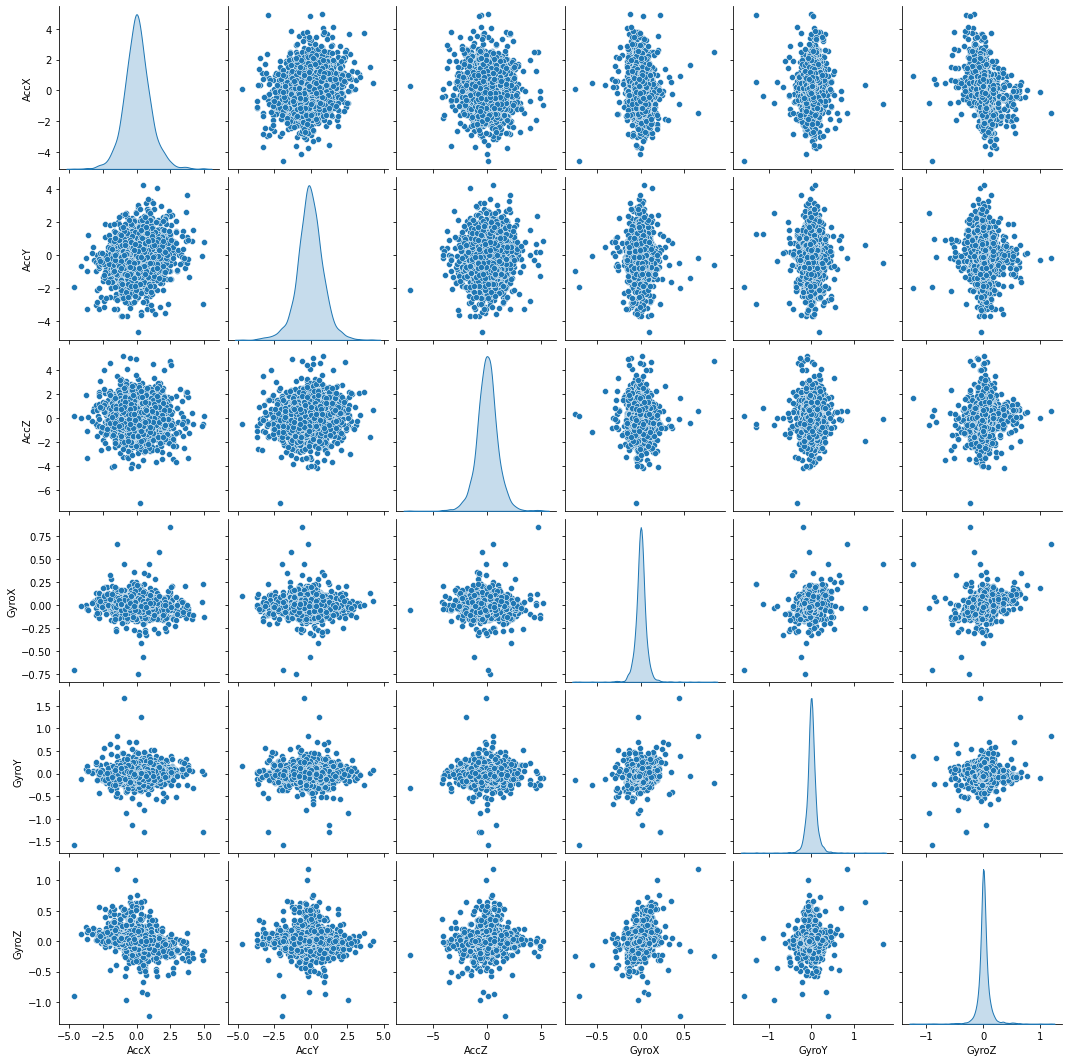

In [55]:
sns.pairplot(train_data[[ 'AccX','AccY','AccZ','GyroX','GyroY','GyroZ']], diag_kind='kde')

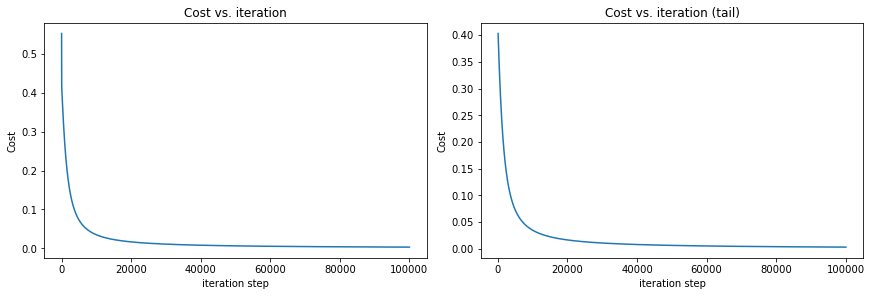

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()